# Visualize the performance of a Convolutional Variational Autoencoder

Load a pre-trained model specified by an experiment/run, and runs a number of visualizations of the performance of the VAE. 

In [1]:
import sys
sys.path.append("..")
# adding the Julian-8897-Conv-VAE-PyTorch into the path
from settings import Config
sys.path.append(Config()["conv_vae"]["code_dir"])
# from encoding_conv_vae.conv_vae import latest_json_and_model

from sensorprocessing import sp_conv_vae
from sensorprocessing import sp_helper

from helper import ui_choose_task, ui_choose_demo
import os
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Oh, this hack was fixing something, but for me it is the other way around
#temp = pathlib.PosixPath
#pathlib.PosixPath = pathlib.WindowsPath

Loading pointer config file: C:\Users\lboloni\.config\BerryPicker\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\settings-LotziYoga.yaml


In [2]:
run = "vae_01"


## Pass one picture through the complete autoencoder

Pass one specific picture through the complete autoencoder. Compare the input and the output. This is basically trying out whether the VAE had captured the picture sufficiently.

This code also is intended as a sample of how to use the pre-trained model, how to feed it new data without the training code. 

Check if the sensor processing object works

In [7]:
def visualize_VAE(sp, picture_name, axoriginal, axreconstr):
    """Visualize the performance of the reconstruction of a VAE sensorprocessing object. Show the original and the reconstruction in fields of a picture."""
    transform = sp_helper.get_transform_to_robot()
    input, image = sp_helper.load_picturefile_to_tensor(picture_name, transform)
    # Running the input on the output
    output, mu, logvar = sp.model(input)
    # Output: the visual reconstruction
    output_for_pic = output[0].cpu().permute(1, 2, 0).detach().numpy()
    # Showing the input and the reconstruction    
    axoriginal.imshow(image)
    axoriginal.set_title("Original")
    axreconstr.imshow(output_for_pic)
    axreconstr.set_title("Reconstruct")
    return output, mu, logvar

# Visualize a random set of images from a task with an SP

In [8]:
# Choose a random set of images from a task

# task_id = None; demo_id = None
task_id = 5; demo_id = 0
_, task_dir = ui_choose_task(offer_task_creation=True, task_id=task_id)
print(task_dir)
demo_dir = ui_choose_demo(task_dir, demo_id=demo_id)
# FIXME: need to choose the demonstration
jpg_files = list(demo_dir.glob("*.jpg"))
n = 6
randomjpg = random.sample(jpg_files, n)


Demo directory C:\Users\lboloni\Documents\Code\_TempData\BerryPicker-demos\demos found with tasks [WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/boxmove'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/marker_solo'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprioception-cluttered'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprioception-uncluttered'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/random-uncluttered'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/random-uncluttered-test'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/tomatopicking'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/touch-brown'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/touch-spoon'), WindowsPat

Note: no system dependent config file G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\conv_vae\vae_01_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: conv_vae/vae_01 successfully loaded
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\conv_vae\vae_01\models\models\VAE_Robot\0108_204230\config.json
Exists!
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\conv_vae\vae_01\models\models\VAE_Robot\0108_204230\checkpoint-epoch10.pth
VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2

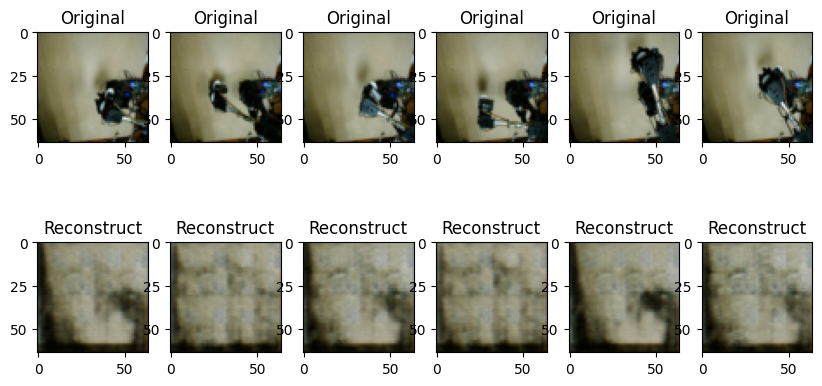

In [9]:

sp = sp_conv_vae.get_sp_of_conv_vae_experiment(run)
fig, axs = plt.subplots(2, n, figsize=(10, 5))
for i in range(n):
    visualize_VAE(sp, randomjpg[i], axs[0,i], axs[1,i])

Note: no system dependent config file G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\conv_vae\vae_01_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: conv_vae/vae_01 successfully loaded
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\conv_vae\vae_01\models\models\VAE_Robot\0108_204230\config.json
Exists!
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\conv_vae\vae_01\models\models\VAE_Robot\0108_204230\checkpoint-epoch10.pth
VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2

tensor([[-0.1168, -0.3562, -0.2508,  0.4004,  0.0644, -0.0644, -0.1340, -0.7392,
         -0.3964, -0.0511,  0.3990,  0.1098, -0.2910,  0.0695, -0.4313, -0.4006,
          0.2520,  0.0931, -0.3233, -0.3646, -0.6321,  0.1016,  0.2629, -0.4960,
          0.3409,  0.0013, -0.0788, -0.2834,  0.6242,  0.6196,  0.5693,  0.1107,
          0.0150, -0.0393, -0.3596, -0.3194, -0.3738, -0.0310,  0.2634, -0.7284,
         -0.3408, -0.6151, -0.0091,  0.5422, -0.2155,  0.4355, -0.2275,  0.4078,
          0.5449, -0.2177,  0.0678,  0.6210,  0.3427,  0.3933,  0.2654,  0.3972,
          0.0824,  0.3355,  0.4359, -0.2264, -0.0295, -0.2147, -0.4613, -0.5436,
          0.7319,  0.3253,  0.2207, -0.3837, -0.4465,  0.1935, -0.7406, -0.4504,
         -0.2991,  0.4155,  0.3250, -0.4198,  0.1054, -0.3285, -0.0631,  0.0164,
          0.0967, -0.0011,  0.0792, -0.3123, -0.0705, -0.4628, -0.1747, -0.0158,
          0.0015,  0.2192,  0.1504, -0.6534, -0.3933,  0.1746,  0.4042, -0.3707,
          0.0139,  0.4719, -

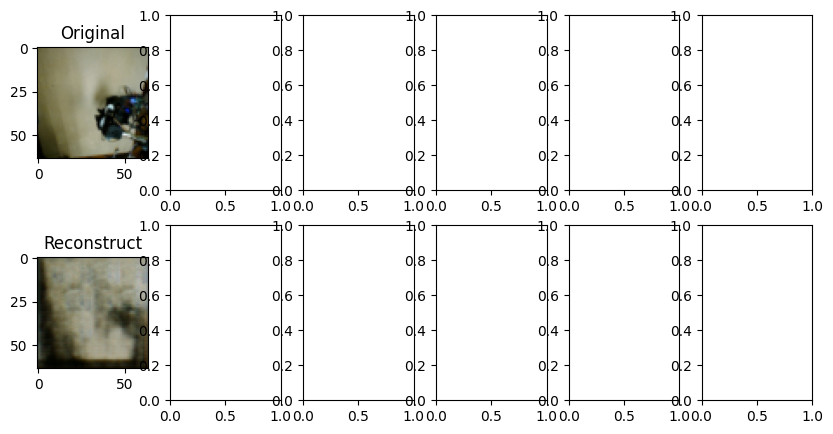

In [11]:

sp = sp_conv_vae.get_sp_of_conv_vae_experiment("vae_01")
fig, axs = plt.subplots(2, n, figsize=(10, 5))
for i in range(n):
    _, mu, _ = visualize_VAE(sp, randomjpg[i], axs[0,i], axs[1,i])
    print(mu)
    break

In [ ]:

# Try to do a decoding from the same mu
z2 = sp.model.reparameterize(mu, logvar)

for i in range(Config().values["robot"]["latent_encoding_size"]):
    z2[0][i] = z2[0][i] + 0.1

#z2[0][1] = 2.0
#z2[0][3] = 2.0
output2 = sp.model.decode(z2)
output_for_pic2 = output2[0].cpu().permute(1, 2, 0).detach().numpy()

# initial and new
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(output_for_pic)
axs[1].imshow(output_for_pic2)


# Generating random samples from the model

In [ ]:
import random

# z2 = model.reparameterize(mu, logvar)
# initial and new
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for x in range(0, 5):
    for y in range(0, 5):
            z2 = sp.model.reparameterize(mu, logvar)
            for i in range(Config().values["robot"]["latent_encoding_size"]):
                z2[0][i] += random.uniform(-0.5, 0.5)
            output2 = sp.model.decode(z2)
            output_for_pic2 = output2[0].cpu().permute(1, 2, 0).detach().numpy()
            axs[x][y].imshow(output_for_pic2)
#axs[0].imshow(output_for_pic)
#axs[1].imshow(output_for_pic2)